# 키움증권 OpenAPI+ 사용 예시

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import logging

In [5]:
logging.basicConfig(
    format='%(asctime)s [%(levelname)s] %(message)s - %(filename)s:%(lineno)d',
    level=logging.DEBUG)

In [6]:
logging.getLogger('matplotlib').setLevel(logging.WARNING)

## 1. 엔트리포인트 객체 생성

In [7]:
from koapy import KiwoomOpenApiPlusEntrypoint

In [8]:
entrypoint = KiwoomOpenApiPlusEntrypoint()

2022-01-18 14:22:15,134 [DEBUG] Testing if client is ready... - KiwoomOpenApiPlusEntrypoint.py:45
2022-01-18 14:22:25,146 [DEBUG] Client is not ready - KiwoomOpenApiPlusEntrypoint.py:47
2022-01-18 14:22:25,146 [DEBUG] Creating a new server... - KiwoomOpenApiPlusEntrypoint.py:48


주요한 기능들은 해당 엔트리포인트의 멤버함수로써 제공된다.

예를 들어 아래와 같이 서버 접속 이전에도 실행 가능한 아래 함수를 활용하면 OpenAPI 가 정상적으로 로드되었는지 간접적으로 확인 가능하다.

In [9]:
module_path = entrypoint.GetAPIModulePath()

In [10]:
module_path

'C:\\OpenAPI'

## 2. 서버 접속

In [11]:
entrypoint.EnsureConnected()

True

자동 로그인 설정이 되어있는 경우 로그인이 자동으로 처리되며, 그렇지 않은 경우에는 수동으로 아이디, 비밀번호 등 로그인 정보를 입력해 처리해주어야 한다.

만약에 함수 인자로 `credential` 정보를 주는 경우 [`pywinauto`](https://github.com/pywinauto/pywinauto) 를 활용하여 자동으로 로그인 처리를 진행한다.
앞서 언급한 키움증권에서 기본으로 제공하는 자동 로그인이 아니라 기존에 수동으로 처리하던 과정을 매크로 형태로 자동으로 처리하는 방식이다.
참고로 [`pywinauto`](https://github.com/pywinauto/pywinauto) 사용을 위해서는 **관리자 권한**이 필요하다.

In [12]:
credential = {
    'user_id': 'id',
    'user_password': 'password',
    'cert_password': 'password',
    'is_simulation': True,
    'account_passwords': {
        '0000000000': '0000',
    }    
}

In [13]:
entrypoint.EnsureConnected(credential)

True

참고로 여기서는 이미 로그인이 되어있는 상황이므로 위의 함수가 추가적인 로그인처리를 진행하지는 않게 된다.

## 3. 기본 함수 실행

다시 한번 기본 함수를 통해 접속상태를 확인해보자. 아래 값이 1 인 경우 정상 접속 상태이다. 접속되어 있지 않은 경우라면 0 을 반환한다.

In [14]:
entrypoint.GetConnectState()

1

이후 예시들에서 사용하기 위해 삼성전자의 코드를 확인한다.

In [15]:
codes = entrypoint.GetCodeListByMarketAsList('0')
names = [entrypoint.GetMasterCodeName(code) for code in codes]

In [16]:
codes_by_name = dict(zip(names, codes))

위에서 `GetCodeListByMarketAsList()` 함수는 기존의 `GetCodeListByMarket()` 함수 호출시 나오는 문자열 형태의 결과를 편의를 위해 리스트 형태로 변환해서 제공한다.

In [17]:
code = samsung_code = codes_by_name['삼성전자']

In [18]:
code

'005930'

## 4. TR 요청 예시

### 상위 함수 사용 예시

몇가지 자주 쓰이는 TR 들에 대해서는 요청 및 결과 이벤트 처리까지 완료해서 결과물만 반환하는 상위함수를 제공하고 있다.

In [19]:
info = entrypoint.GetStockBasicInfoAsDict(code) # opt10001

In [20]:
info

{'종목코드': '005930',
 '종목명': '삼성전자',
 '결산월': '12',
 '액면가': '100',
 '자본금': '7780',
 '상장주식': '5969783',
 '신용비율': '+0.13',
 '연중최고': '+79800',
 '연중최저': '-76400',
 '시가총액': '4596733',
 '시가총액비중': '',
 '외인소진률': '+52.23',
 '대용가': '60450',
 'PER': '20.05',
 'EPS': '3841',
 'ROE': '10.0',
 'PBR': '1.95',
 'EV': '5.36',
 'BPS': '39406',
 '매출액': '2368070',
 '영업이익': '359939',
 '당기순이익': '264078',
 '250최고': '+91800',
 '250최저': '-68300',
 '시가': '+77600',
 '고가': '+77800',
 '저가': '-76600',
 '상한가': '+100500',
 '하한가': '-54300',
 '기준가': '77500',
 '예상체결가': '-0',
 '예상체결수량': '0',
 '250최고가일': '20210115',
 '250최고가대비율': '-16.12',
 '250최저가일': '20211013',
 '250최저가대비율': '+12.74',
 '현재가': '-77000',
 '대비기호': '5',
 '전일대비': '-500',
 '등락율': '-0.65',
 '거래량': '7715780',
 '거래대비': '-87.83',
 '액면가단위': '원',
 '유통주식': '4456888',
 '유통비율': '74.7'}

In [21]:
data = entrypoint.GetDailyStockDataAsDataFrame(code) # opt10081

2022-01-18 14:22:38,267 [DEBUG] Received 600 records from 2022-01-18 00:00:00 to 2019-08-16 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:573
2022-01-18 14:22:38,572 [DEBUG] Received 600 records from 2019-08-14 00:00:00 to 2017-03-03 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:573
2022-01-18 14:22:38,880 [DEBUG] Received 600 records from 2017-03-02 00:00:00 to 2014-09-26 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:573
2022-01-18 14:22:39,197 [DEBUG] Received 600 records from 2014-09-25 00:00:00 to 2012-04-20 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:573
2022-01-18 14:22:56,202 [DEBUG] Received 600 records from 2012-04-19 00:00:00 to 2009-11-24 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:573
2022-01-18 14:22:56,502 [DEBUG] Received 600 records from 2009-11-23 00:00:00 to 2007-06-27 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper

In [22]:
data

,종목코드,현재가,거래량,거래대금,일자,시가,고가,저가,수정주가구분,수정비율,대업종구분,소업종구분,종목정보,수정주가이벤트,전일종가
0,005930,77000,7715780,595861,20220118,77600,77800,76600,,,,,,,
1,,77500,8785122,678903,20220117,77600,77800,76900,,,,,,,
2,,77300,10096725,781575,20220114,77700,78100,77100,,,,,,,
3,,77900,13889401,1088598,20220113,79300,79300,77900,,,,,,,
4,,78900,11000502,868911,20220112,79500,79600,78600,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9787,,8010,4970,1,19850109,8240,8240,7950,,,,,,,
9788,,8300,12930,4,19850108,8400,8400,8300,,,,,,,
9789,,8410,11810,3,19850107,8400,8500,8390,,,,,,,
9790,,8390,1660,0,19850105,8400,8440,8390,,,,,,,


데이터가 최대한 있는 그대로 (주로 문자열 형태로) 반환되기 때문에 필요하다면 타입 변환을 거쳐 사용한다.

In [23]:
dates = pd.to_datetime(data['일자'], format='%Y%m%d')
closes = pd.to_numeric(data['현재가'])

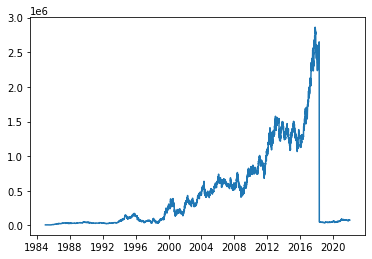

In [24]:
plt.plot(dates, closes)

주가 데이터에서 수정주가가 필요한 경우에는 `adjusted_price=True` 파라미터를 설정해 호출한다.

In [25]:
data_adjusted = entrypoint.GetDailyStockDataAsDataFrame(code, adjusted_price=True)

2022-01-18 14:23:33,209 [DEBUG] Received 600 records from 2022-01-18 00:00:00 to 2019-08-16 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:573
2022-01-18 14:23:33,499 [DEBUG] Received 600 records from 2019-08-14 00:00:00 to 2017-03-03 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:573
2022-01-18 14:23:50,269 [DEBUG] Received 600 records from 2017-03-02 00:00:00 to 2014-09-26 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:573
2022-01-18 14:23:50,553 [DEBUG] Received 600 records from 2014-09-25 00:00:00 to 2012-04-20 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:573
2022-01-18 14:23:50,856 [DEBUG] Received 600 records from 2012-04-19 00:00:00 to 2009-11-24 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:573
2022-01-18 14:23:51,210 [DEBUG] Received 600 records from 2009-11-23 00:00:00 to 2007-06-27 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper

In [26]:
dates = pd.to_datetime(data_adjusted['일자'], format='%Y%m%d')
closes = pd.to_numeric(data_adjusted['현재가'])

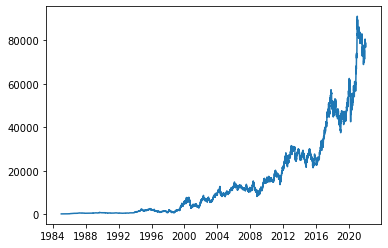

In [27]:
plt.plot(dates, closes)

### 하위 함수 사용 예시

만약에 필요한 TR 에 대한 편의함수가 제공되지 않는 경우라면 아래처럼 직접 TR 요청에 필요한 입력값을 설정해 요청하고, 이후 스트림 형태로 들어오는 이벤트 또한 직접 처리해주는 방식으로 사용할 수 있다.

In [28]:
rqname = '주식기본정보요청'
trcode = 'opt10001'
screen_no = '0001'  # 화면번호, 0000 을 제외한 4자리 숫자 임의로 지정, None 의 경우 내부적으로 화면번호 자동할당
inputs = {'종목코드': code}

In [29]:
output = {}

In [30]:
logging.info('Requesting data for request name: %s', rqname)
for event in entrypoint.TransactionCall(rqname, trcode, screen_no, inputs):
    logging.info('Got event for request: %s', rqname)
    names = event.single_data.names
    values = event.single_data.values
    for name, value in zip(names, values):
        output[name] = value

2022-01-18 14:24:27,606 [INFO] Requesting data for request name: 주식기본정보요청 - <ipython-input-30-84e17a5232d0>:1
2022-01-18 14:24:44,007 [INFO] Got event for request: 주식기본정보요청 - <ipython-input-30-84e17a5232d0>:3


In [31]:
output

{'종목코드': '005930',
 '종목명': '삼성전자',
 '결산월': '12',
 '액면가': '100',
 '자본금': '7780',
 '상장주식': '5969783',
 '신용비율': '+0.13',
 '연중최고': '+79800',
 '연중최저': '-76400',
 '시가총액': '4596733',
 '시가총액비중': '',
 '외인소진률': '+52.23',
 '대용가': '60450',
 'PER': '20.05',
 'EPS': '3841',
 'ROE': '10.0',
 'PBR': '1.95',
 'EV': '5.36',
 'BPS': '39406',
 '매출액': '2368070',
 '영업이익': '359939',
 '당기순이익': '264078',
 '250최고': '+91800',
 '250최저': '-68300',
 '시가': '+77600',
 '고가': '+77800',
 '저가': '-76600',
 '상한가': '+100500',
 '하한가': '-54300',
 '기준가': '77500',
 '예상체결가': '-0',
 '예상체결수량': '0',
 '250최고가일': '20210115',
 '250최고가대비율': '-16.12',
 '250최저가일': '20211013',
 '250최저가대비율': '+12.74',
 '현재가': '-77000',
 '대비기호': '5',
 '전일대비': '-500',
 '등락율': '-0.65',
 '거래량': '7726846',
 '거래대비': '-87.95',
 '액면가단위': '원',
 '유통주식': '4456888',
 '유통비율': '74.7'}

위의 코드에서 `TransactionCall()` 함수의 경우 반환되는 스트림의 `event` 객체는 `ListenResponse` 타입의 gRPC 메시지 형태로 반환된다.

In [32]:
from pprint import PrettyPrinter
from google.protobuf.json_format import MessageToDict

pp = PrettyPrinter()

def pprint_event(event):
    pp.pprint(MessageToDict(event, preserving_proto_field_name=True))

In [33]:
pprint_event(event)

{'arguments': [{'string_value': '0001'},
               {'string_value': '주식기본정보요청'},
               {'string_value': 'opt10001'},
               {'string_value': ''},
               {'string_value': '0'}],
 'name': 'OnReceiveTrData',
 'single_data': {'names': ['종목코드',
                           '종목명',
                           '결산월',
                           '액면가',
                           '자본금',
                           '상장주식',
                           '신용비율',
                           '연중최고',
                           '연중최저',
                           '시가총액',
                           '시가총액비중',
                           '외인소진률',
                           '대용가',
                           'PER',
                           'EPS',
                           'ROE',
                           'PBR',
                           'EV',
                           'BPS',
                           '매출액',
                           '영업이익',
                           '당기순이익',
    

해당 메시지의 형태는 [`koapy/backend/kiwoom_open_api_plus/grpc/KiwoomOpenApiPlusService.proto`](https://github.com/elbakramer/koapy/blob/master/koapy/backend/kiwoom_open_api_plus/grpc/KiwoomOpenApiPlusService.proto) 파일의 내용, 구체적으로 아래와 같은 메시지의 정의 부분을 참고하기 바란다.

```proto
message ListenResponse {
  string name = 1;
  repeated Argument arguments = 2;
  SingleData single_data = 3;
  MultiData multi_data = 4;
}
```

각 TR 에 따라 싱글데이터/멀티데이터가 선택적으로 설정되어 반환되는데, 그러한 입력/출력과 관련된 정보들은 [KOAStudio](https://download.kiwoom.com/web/openapi/kiwoom_openapi_plus_devguide_ver_1.5.pdf#page=7) 프로그램을 활용하거나 아니면 아래처럼 `KiwoomOpenApiPlusTrInfo` 를 통해 프로그램 내에서 확인할 수 있다.

In [34]:
from koapy import KiwoomOpenApiPlusTrInfo

In [35]:
tr_info = KiwoomOpenApiPlusTrInfo.get_trinfo_by_code('opt10001')

In [36]:
tr_info.inputs

[KiwoomOpenApiPlusTrInfo.Field('종목코드', 0, 6, 9001)]

In [37]:
tr_info.single_outputs

[KiwoomOpenApiPlusTrInfo.Field('종목코드', 0, 20, 389),
 KiwoomOpenApiPlusTrInfo.Field('종목명', 20, 50, 302),
 KiwoomOpenApiPlusTrInfo.Field('결산월', 40, 20, 315),
 KiwoomOpenApiPlusTrInfo.Field('액면가', 60, 20, 310),
 KiwoomOpenApiPlusTrInfo.Field('자본금', 80, 20, 309),
 KiwoomOpenApiPlusTrInfo.Field('상장주식', 100, 20, 312),
 KiwoomOpenApiPlusTrInfo.Field('신용비율', 120, 20, 329),
 KiwoomOpenApiPlusTrInfo.Field('연중최고', 140, 20, 1006),
 KiwoomOpenApiPlusTrInfo.Field('연중최저', 160, 20, 1009),
 KiwoomOpenApiPlusTrInfo.Field('시가총액', 180, 20, 311),
 KiwoomOpenApiPlusTrInfo.Field('시가총액비중', 200, 20, 336),
 KiwoomOpenApiPlusTrInfo.Field('외인소진률', 220, 20, 314),
 KiwoomOpenApiPlusTrInfo.Field('대용가', 240, 20, 308),
 KiwoomOpenApiPlusTrInfo.Field('PER', 260, 20, 1600),
 KiwoomOpenApiPlusTrInfo.Field('EPS', 280, 20, 1604),
 KiwoomOpenApiPlusTrInfo.Field('ROE', 300, 20, 1630),
 KiwoomOpenApiPlusTrInfo.Field('PBR', 320, 20, 1601),
 KiwoomOpenApiPlusTrInfo.Field('EV', 340, 20, 1608),
 KiwoomOpenApiPlusTrInfo.Field('BPS

In [38]:
tr_info.multi_outputs

[]

## 5. 조건검색 예시

조건검색을 사용하기 위해서는 먼저 서버에 저장된 조건들을 불러와야 한다.

In [39]:
entrypoint.EnsureConditionLoaded()

1

불러온 조건들의 목록은 아래 함수로 확인이 가능하다.

In [40]:
conditions = entrypoint.GetConditionNameListAsList()

In [41]:
conditions

[(0, '대형 저평가 우량주'), (1, '중소형 저평가주')]

이후 예시의 정상동작을 위해서는 아래에서 사용되는 조건들과 같은 이름을 가지는 조건들이 미리 저장되어 있어야 한다.

- 대형 저평가 우량주
- 중소형 저평가주

위의 조건식들은 키움에서 예시로 제공하는 추천식들을 그대로 이름을 똑같이 해서 저장한 것들이다.
참고로 조건들을 편집하고 저장하는건 영웅문 HTS 내부에서만 가능하기 때문에 따로 HTS 를 열어 편집해주어야 한다.

조건식이 편집된 이후에 해당 조건식을 기존에 동작중인 OpenAPI 에도 갱신하고 싶은 경우, 아래 함수를 통해 편집된 조건식을 새로 불러온다.

In [42]:
entrypoint.LoadCondition()

1

### 일반 조건검색 예시

In [43]:
condition_name = '대형 저평가 우량주'

In [44]:
codes, info = entrypoint.GetCodeListByCondition(condition_name, with_info=True)

위의 함수에서 `with_info=True` 로 호출하게 되면 조건을 만족하는 코드 목록 (`codes`) 뿐만 아니라 해당 종목들에 대한 기본정보들도 (`info`) 같이 가져와 DataFrame 형태로 제공한다.

In [45]:
info

,종목코드,종목명,현재가,기준가,전일대비,전일대비기호,등락율,거래량,거래대금,체결량,...,ELW만기일,미결제약정,미결제전일대비,이론가,내재변동성,델타,감마,쎄타,베가,로
0,000240,한국앤컴퍼니,-14150,14450,-300,5,-2.08,56285,805,+3,...,00000000,,,,,,,,,
1,001800,오리온홀딩스,-14900,15000,-100,5,-0.67,52845,787,+9,...,00000000,,,,,,,,,
2,001880,DL건설,-27950,29500,-1550,5,-5.25,93302,2648,+84,...,00000000,,,,,,,,,
3,003230,삼양식품,-91400,93800,-2400,5,-2.56,38149,3516,+4,...,00000000,,,,,,,,,
4,003550,LG,-79300,80500,-1200,5,-1.49,180692,14450,+14,...,00000000,,,,,,,,,
5,004000,롯데정밀화학,-71600,72500,-900,5,-1.24,56962,4103,+1,...,00000000,,,,,,,,,
6,006040,동원산업,-219000,222500,-3500,5,-1.57,2350,520,-1,...,00000000,,,,,,,,,
7,006390,한일현대시멘트,-31850,33050,-1200,5,-3.63,24037,775,-1,...,00000000,,,,,,,,,
8,006650,대한유화,-175000,179000,-4000,5,-2.23,35023,6159,+1,...,00000000,,,,,,,,,
9,007310,오뚜기,-438000,438500,-500,5,-0.11,1551,681,-1,...,00000000,,,,,,,,,


### 실시간 조건검색 예시

같은 조건식은 1분에 1건 제한이므로 예시 실행시 제한을 회피하기 위해서 새로 설정한다.

In [50]:
condition_name = '중소형 저평가주'

In [51]:
logging.info('Start listening realtime condition stream...')
stream = entrypoint.GetCodeListByConditionAsStream(condition_name)

2022-01-18 14:28:20,494 [INFO] Start listening realtime condition stream... - <ipython-input-51-f04b6a919f1c>:1


실시간 조건검색의 경우 조건에 만족/불만족하는 종목이 편입/이탈할때마다 계속해서 이벤트를 반환한다. 예시에서는 10초 동안만 이벤트를 확인해본다.

In [52]:
import threading

def stop_listening():
    logging.info('Stop listening realtime condition events...')
    stream.cancel()
    
threading.Timer(65.0, stop_listening).start() # 65초 이후에 gRPC 커넥션 종료하도록 설정

In [53]:
import grpc

events = []

try:
    for event in stream:
        events.append(event)
        pprint_event(event)
except grpc.RpcError as e:
    print(e)

{'arguments': [{'string_value': '8686'},
               {'string_value': '900290;900310;900340;002170;017890;036190;037710;049430;073560;084650;140910;187870;192440;210540;225220;352700;950190;900280;900250;'},
               {'string_value': '중소형 저평가주'},
               {'long_value': '1'},
               {'long_value': '0'}],
 'name': 'OnReceiveTrCondition'}


2022-01-18 14:29:25,810 [INFO] Stop listening realtime condition events... - <ipython-input-52-679886c13a31>:4


<_MultiThreadedRendezvous of RPC that terminated with:
	status = StatusCode.CANCELLED
	details = "Locally cancelled by application!"
	debug_error_string = "None"
>


위에서 `stream` 결과는 [`grpc`](https://grpc.github.io/grpc/python/) 의 [`_MultiThreadedRendezvous`](https://github.com/grpc/grpc/blob/53ba4a101e80e1a67d4ec741b7e1aad6ea8d790f/src/python/grpcio/grpc/_channel.py#L652) 객체인데 사실 해당 타입은 직접적으로 외부에 노출되는 타입은 아니다. 대신에 해당 타입은 내부적으로 [`grpc.RpcError`](https://grpc.github.io/grpc/python/grpc.html?highlight=rpcerror#grpc.RpcError), [`grpc.RpcContext`](https://grpc.github.io/grpc/python/grpc.html?highlight=rpccontext#grpc.RpcContext), [`grpc.Call`](https://grpc.github.io/grpc/python/grpc.html?highlight=call#grpc.Call), [`grpc.Future`](https://grpc.github.io/grpc/python/grpc.html?highlight=future#grpc.Future) 인터페이스를 구현하고 있으므로 해당 객체의 사용법과 관련해서는 각각의 인터페이스를 참고하자.

최초 이벤트로 반환되는 코드 목록들에 대해서 앞선 일반조건 검색 예시에서와 같이 종목들의 기본정보들을 별도로 가져오고 싶다면 대략 아래처럼 해볼 수 있다.

In [54]:
if len(events) > 0:
    codes = events[0].arguments[1].string_value.strip(';').split(';')
else:
    codes = [samsung_code]

In [55]:
codes

['900290',
 '900310',
 '900340',
 '002170',
 '017890',
 '036190',
 '037710',
 '049430',
 '073560',
 '084650',
 '140910',
 '187870',
 '192440',
 '210540',
 '225220',
 '352700',
 '950190',
 '900280',
 '900250']

In [56]:
info = entrypoint.GetStockQuoteInfoAsDataFrame(codes)

In [57]:
info

,종목코드,종목명,현재가,기준가,전일대비,전일대비기호,등락율,거래량,거래대금,체결량,...,ELW만기일,미결제약정,미결제전일대비,이론가,내재변동성,델타,감마,쎄타,베가,로
0,900290,GRT,1225,1225,0,3,0.00,123651,152,-130,...,00000000,,,,,,,,,
1,900310,컬러레이,-1425,1465,-40,5,-2.73,147191,213,+294,...,00000000,,,,,,,,,
2,900340,윙입푸드,-1175,1215,-40,5,-3.29,187400,224,-144,...,00000000,,,,,,,,,
3,002170,삼양통상,-57500,57900,-400,5,-0.69,3467,201,-4,...,00000000,,,,,,,,,
4,017890,한국알콜,-11500,11600,-100,5,-0.86,56037,647,+1,...,00000000,,,,,,,,,
5,036190,금화피에스시,-30450,30800,-350,5,-1.14,3356,102,+1,...,00000000,,,,,,,,,
6,037710,광주신세계,171500,171500,0,3,0.00,510,88,-28,...,00000000,,,,,,,,,
7,049430,코메론,-10450,10600,-150,5,-1.42,20522,215,+2,...,00000000,,,,,,,,,
8,073560,우리손에프앤지,-2135,2150,-15,5,-0.70,162170,349,-170,...,00000000,,,,,,,,,
9,084650,랩지노믹스,-22900,23000,-100,5,-0.43,138975,3241,+1,...,00000000,,,,,,,,,


아니면 `stream` 생성시에 `with_info=True` 를 주는 경우 매 조건 이벤트마다 바로 뒤에 관심종목정보요청 이벤트를 이어서 반환하는데, 결국은 약간의 별도 데이터 처리가 필요하다.

In [58]:
condition_name = '중소형 저평가주'

In [59]:
logging.info('Start listening realtime condition stream...')
stream = entrypoint.GetCodeListByConditionAsStream(condition_name, with_info=True)

2022-01-18 14:29:25,992 [INFO] Start listening realtime condition stream... - <ipython-input-59-433baeb2b447>:1


실시간 조건검색의 경우 조건에 만족/불만족하는 종목이 편입/이탈할때마다 계속해서 이벤트를 반환한다. 예시에서는 10초 동안만 이벤트를 확인해본다.

In [60]:
import threading

def stop_listening():
    logging.info('Stop listening realtime condition events...')
    stream.cancel()
    
threading.Timer(10.0, stop_listening).start() # 10초 이후에 gRPC 커넥션 종료하도록 설정

In [61]:
import grpc

events = []

try:
    for event in stream:
        events.append(event)
        pprint_event(event)
except grpc.RpcError as e:
    print(e)

{'arguments': [{'string_value': '9991'},
               {'string_value': '900290;900310;900340;002170;017890;036190;037710;049430;073560;084650;140910;187870;192440;210540;225220;352700;950190;900280;900250;'},
               {'string_value': '중소형 저평가주'},
               {'long_value': '1'},
               {'long_value': '0'}],
 'name': 'OnReceiveTrCondition'}
{'arguments': [{'string_value': '9991'},
               {'string_value': '관심종목정보요청'},
               {'string_value': 'OPTKWFID'},
               {'string_value': ''},
               {'string_value': '0'}],
 'multi_data': {'names': ['종목코드',
                          '종목명',
                          '현재가',
                          '기준가',
                          '전일대비',
                          '전일대비기호',
                          '등락율',
                          '거래량',
                          '거래대금',
                          '체결량',
                          '체결강도',
                          '전일거래량대비',
                        

2022-01-18 14:29:36,025 [INFO] Stop listening realtime condition events... - <ipython-input-60-c769dc00f6f7>:4


<_MultiThreadedRendezvous of RPC that terminated with:
	status = StatusCode.CANCELLED
	details = "Locally cancelled by application!"
	debug_error_string = "None"
>


In [62]:
condition_event = events[0]
info_event = events[1]

records = [values.values for values in info_event.multi_data.values]
columns = info_event.multi_data.names

info = pd.DataFrame.from_records(records, columns=columns)

In [63]:
info

,종목코드,종목명,현재가,기준가,전일대비,전일대비기호,등락율,거래량,거래대금,체결량,...,ELW만기일,미결제약정,미결제전일대비,이론가,내재변동성,델타,감마,쎄타,베가,로
0,900290,GRT,1225,1225,0,3,0.00,123651,152,-130,...,00000000,,,,,,,,,
1,900310,컬러레이,-1425,1465,-40,5,-2.73,147191,213,+294,...,00000000,,,,,,,,,
2,900340,윙입푸드,-1175,1215,-40,5,-3.29,187400,224,-144,...,00000000,,,,,,,,,
3,002170,삼양통상,-57500,57900,-400,5,-0.69,3467,201,-4,...,00000000,,,,,,,,,
4,017890,한국알콜,-11500,11600,-100,5,-0.86,56037,647,+1,...,00000000,,,,,,,,,
5,036190,금화피에스시,-30450,30800,-350,5,-1.14,3356,102,+1,...,00000000,,,,,,,,,
6,037710,광주신세계,171500,171500,0,3,0.00,510,88,-28,...,00000000,,,,,,,,,
7,049430,코메론,-10450,10600,-150,5,-1.42,20522,215,+2,...,00000000,,,,,,,,,
8,073560,우리손에프앤지,-2135,2150,-15,5,-0.70,162170,349,-170,...,00000000,,,,,,,,,
9,084650,랩지노믹스,-22900,23000,-100,5,-0.43,138975,3241,+1,...,00000000,,,,,,,,,


## 6. 주문처리 예시

In [64]:
first_account_no = entrypoint.GetFirstAvailableAccount()

In [65]:
request_name = "삼성전자 1주 시장가 신규 매수"  # 사용자 구분명, 구분가능한 임의의 문자열
screen_no = "0001"  # 화면번호, 0000 을 제외한 4자리 숫자 임의로 지정, None 의 경우 내부적으로 화면번호 자동할당
account_no = first_account_no  # 계좌번호 10자리, 여기서는 계좌번호 목록에서 첫번째로 발견한 계좌번호로 매수처리
order_type = 1  # 주문유형, 1 : 신규매수
code = samsung_code  # 종목코드, 앞의 삼성전자 종목코드
quantity = 1  # 주문수량, 1주 매수
price = 0  # 주문가격, 시장가 매수는 가격설정 의미없음
quote_type = "03"  # 거래구분, 03 : 시장가
original_order_no = ""  # 원주문번호, 주문 정정/취소 등에서 사용

주문유형 및 거래구분 등과 관련된 자세한 정보들은 [KOAStudio](https://download.kiwoom.com/web/openapi/kiwoom_openapi_plus_devguide_ver_1.5.pdf#page=7) 프로그램에서 확인할 수 있다.

주문처리는 실제 시장이 열려있는 동안에만 테스트해볼 수 있기 때문에, 현재 장이 열려 있는지 먼저 확인하고 해당 경우에 한정해서 테스트를 진행한다.

In [66]:
from pandas import Timestamp
from exchange_calendars import get_calendar

krx_calendar = get_calendar('XKRX')

def is_currently_in_session():
    calendar = krx_calendar
    now = Timestamp.now(calendar.tz).floor("T")
    previous_open = calendar.previous_open(now).astimezone(calendar.tz)
    next_close = calendar.next_close(previous_open).astimezone(calendar.tz)
    return previous_open <= now <= next_close

In [67]:
if is_currently_in_session():
    logging.info('Sending order to buy %s, quantity of 1 stock, at market price...', code)
    for event in entrypoint.OrderCall(request_name, screen_no, account_no, order_type, code, quantity, price, quote_type, original_order_no):
        pprint_event(event)
else:
    logging.info('Cannot send an order while market is not open, skipping...')

2022-01-18 14:29:41,362 [INFO] Sending order to buy 005930, quantity of 1 stock, at market price... - <ipython-input-67-37048f99b24d>:2


{'arguments': [{'string_value': '0001'},
               {'string_value': '삼성전자 1주 시장가 신규 매수'},
               {'string_value': 'KOA_NORMAL_BUY_KP_ORD'},
               {'string_value': '[100000] 모의투자 매수주문완료'}],
 'name': 'OnReceiveMsg'}
{'arguments': [{'string_value': '0001'},
               {'string_value': '삼성전자 1주 시장가 신규 매수'},
               {'string_value': 'KOA_NORMAL_BUY_KP_ORD'},
               {'string_value': ''},
               {'string_value': ''}],
 'name': 'OnReceiveTrData',
 'single_data': {'names': ['주문번호'], 'values': ['0163911']}}
{'arguments': [{'string_value': '0'},
               {'long_value': '35'},
               {'string_value': '9201;9203;9205;9001;912;913;302;900;901;902;903;904;905;906;907;908;909;910;911;10;27;28;914;915;938;939;919;920;921;922;923;949;10010;969;819'}],
 'name': 'OnReceiveChejanData',
 'single_data': {'names': ['계좌번호',
                           '주문번호',
                           '관리사번',
                           '종목코드',
                     

주문 이벤트는 기본적으로 주문수량이 모두 소진되기 전까지 이벤트를 듣도록 되어있으며, 다른 이벤트 스트림과 동일하게 `stream.cancel()` 의 형태로 이벤트 스트림을 더이상 듣지 않도록 하는것이 가능하다. 다만 이벤트 스트림을 취소하는 것이 기존 주문까지 취소하는 것은 아니기 때문에 주문취소나 정정등을 위해서는 별도의 취소/정정 주문을 넣어줘야 한다.

여기서 반환되는 이벤트 객체 역시 앞선 TR 예시에서와 동일하게 `ListenResponse` 타입의 gRPC 메시지 형태로 반환된다. 

## 7. 실시간 데이터 처리 예시

In [68]:
from koapy import KiwoomOpenApiPlusRealType

In [69]:
code_list = [code]
fid_list = KiwoomOpenApiPlusRealType.get_fids_by_realtype_name('주식시세')
opt_type = '0' # 기존 화면에 추가가 아니라 신규 생성, 1 의 경우 기존 화면번호에 추가

In [70]:
logging.info('Start listening realtime stock data for code: %s', code)
stream = entrypoint.GetRealDataForCodesAsStream(
    code_list,
    fid_list,
    opt_type,
    screen_no=None,  # 화면번호, 0000 을 제외한 4자리 숫자 임의로 지정, None 의 경우 내부적으로 화면번호 자동할당
    infer_fids=True,  # True 로 설정 시 주어진 fid_list 를 고집하지 말고 이벤트 처리 함수의 인자로 전달받는 실시간데이터 이름에 따라 유연하게 fid_list 를 추론
    readable_names=True,  # True 로 설정 시 각 fid 마다 숫자 대신 읽을 수 있는 이름으로 변환하여 반환
    fast_parse=False,  # True 로 설정 시 이벤트 처리 함수내에서 데이터 값 읽기 시 GetCommRealData() 함수 호출 대신, 이벤트 처리 함수의 인자로 넘어오는 데이터를 직접 활용, infer_fids 가 True 로 설정된 경우만 유의미함
)

2022-01-18 14:29:43,322 [INFO] Start listening realtime stock data for code: 005930 - <ipython-input-70-dd8474120071>:1


In [71]:
import threading

def stop_listening():
    logging.info('Stop listening realtime events...')
    stream.cancel()
    
threading.Timer(10.0, stop_listening).start() # 10초 이후에 gRPC 커넥션 종료하도록 설정

In [72]:
import grpc

try:
    for i, event in enumerate(stream):
        if i < 10:
            pprint_event(event) # 노트북 출력이 너무 길어질 수 있어 최초 10개만 출력
except grpc.RpcError as e:
    print(e)

{'arguments': [{'string_value': '005930'},
               {'string_value': '주식체결'},
               {'string_value': '142942\t-77100\t-400\t-0.52\t-77100\t-76900\t'
                                '+3\t7884712\t608869\t+77600\t+77800\t-76600\t'
                                '5\t-900410\t-70033816000\t-89.75\t0.13\t201\t'
                                '61.12\t4602702\t2\t0\t-89.68\t000000\t000000\t'
                                '11814\t090003\t100015\t133453\t4817707\t'
                                '2944634\t-37.93\t30338\t31739\t+231\t 0\t+3\t'
                                '+3\t30840\t24672\t77222\t411'}],
 'name': 'OnReceiveRealData',
 'single_data': {'names': ['체결시간',
                           '현재가',
                           '전일대비',
                           '등락율',
                           '매도호가',
                           '매수호가',
                           '거래량',
                           '누적거래량',
                           '누적거래대금',
                           '시

2022-01-18 14:29:53,341 [INFO] Stop listening realtime events... - <ipython-input-71-f9a2c4046337>:4


<_MultiThreadedRendezvous of RPC that terminated with:
	status = StatusCode.CANCELLED
	details = "Locally cancelled by application!"
	debug_error_string = "None"
>
